In [1]:
import chess
import chess.engine
import random
import numpy

In [2]:
# Traduction de l'échiquier

# Dictionnaire représentant les index de l'échiquier
squares_i = {
    'a':0,
    'b':1,
    'c':2,
    'd':3,
    'e':4,
    'f':5,
    'g':6,
    'h':7
}

# Prend en paramètre un chiffre entre 0 et 63, et le traduit en
# tuple qui indique l'index du carré sur le jeu
# par exemple 0 est traduit par A1 qui est ensuite traduit par (7,0)
def translate_index(square):
    letters = chess.square_name(square)
    return 8 - int(letters[1]), squares_i[letters[0]]

In [3]:
# Création du modèle de données de l'échiquier


# Fonction permettant de traduire l'échiquier de base en 14 matrices différentes
# représentant toutes les types de pièces sur le jeux ainsi quel les déplacements
# des deux joueurs.
# Retourne un "array" de 14 matrix contenant :
# matrix  0 : "Pawns" des blancs
# matrix  1 : "Knights" des blancs
# matrix  2 : "Bishops" des blancs
# matrix  3 : "Rooks" des blancs
# matrix  4 : "Queen" du blanc
# matrix  5 : "King" du blanc
# matrix  6 : "Pawns" des noirs
# matrix  7 : "Knights" des noirs
# matrix  8 : "Bishops" des noirs
# matrix  9 : "Rooks" des noirs
# matrix 10 : "Queen" du noir
# matrix 11 : "King" du noir
# matrix 12 : Déplacements légales des blancs
# matrix 13 : Déplacements légales des noirs
def create_3d_matrix_representation(board):
    
    board_matrix = numpy.zeros((14,8,8), dtype=numpy.int8)
    # print(board_matrix) # PRINT
    
    for piece in chess.PIECE_TYPES: # Pour chaque type de pièce du jeu
        # print(piece) # PRINT
        board_matrix[piece - 1] = create_matrix_by_piece(piece, chess.WHITE)
        board_matrix[piece + 5] = create_matrix_by_piece(piece, chess.BLACK)
    
    board_matrix[12] = create_matrix_by_turn(chess.WHITE)
    board_matrix[13] = create_matrix_by_turn(chess.BLACK)
    return board_matrix


# Fonction permettant de créer une matrix selon le type de pièce et la couleur du joueur
# Prend le type de la pièce (de 0 à 5) et le tour du joueur (True or False)
# Afin de recréer la matrix des pièces sur le jeu
# Retourne une matrix identifiant les pièces sur le jeu
def create_matrix_by_piece(piece, color):
    matrix = numpy.zeros((8,8), dtype=numpy.int8)
    for square in board.pieces(piece, color):
        # print(square) # PRINT
        i = numpy.unravel_index(square,(8, 8))
        # print(i) # PRINT
        matrix[7 - i[0]][i[1]] = 1
    return matrix


# Fonction permettant de créer une matrix selon les déplacements légales
# du joueur.
# Retourne une matrix identifiant chaque carré étant possible d'être jouer par le joueur
def create_matrix_by_turn(turn):
    temp = board.turn
    matrix = numpy.zeros((8,8), dtype=numpy.int8)
    board.turn = turn
    for move in board.legal_moves:
        i, j = translate_index(move.to_square)
        matrix[i][j] = 1
    board.turn = temp
    return matrix



In [4]:
# Impression de l'échiquier de base pour tester la matrice

# Utilise chess pour générer un jeu de base qui ensuite est traduit 
# en une matrice représentant les différentes pièces du jeux ainsi que les deplacements
# des deux joueurs
board = chess.Board()
print(board)
print(create_3d_matrix_representation(board))

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
[[[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [1 1 1 1 1 1 1 1]
  [0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 1 0 0 0 0 1 0]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 1 0 0 1 0 0]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 1]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0 0]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  

In [5]:
# Importation de TensorFlow pour utiliser l'API Keras

# Création du système de neurone à l'aide de Tensorflow
# Utilisé pour le système de neurones
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.utils as utils
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.callbacks as callbacks

# Importation de os pour régler un problème engendrer avec mon environnement
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # Éviter l'erreur de duplication de librairie

In [6]:
def build_model(conv_size, conv_depth):
    board_matrix = layers.Input(shape=(14,8,8))
    
    # Convulational Neural Networks
    # Détecte des "patterns" dans les matrices
    # ---
    # Utilise tout d'abord un "convulational layer" pour repérer les "patterns" dans les matrices
    # Le convulational layer utilise un filtre (qui est une matrice) et utilise ce filtre pour
    # "scanner" la matrice afin d'obtenir une deuxième matrice.
    # ---
    # Ensuite, un "flattening layer" utilise la matrice nouvellement créer par le "convulational layer"
    # et transforme la matrice de deux dimensions à un tableau à une dimension, afin d'être traiter par les
    # "layers" suivants.
    # ---
    # Ensuite, un "dense layer" permet d'effectuer, grâce aux noeuds dans le "layer", des opérations logiques
    # AND OR ou XOR, afin de consolider les valeurs convergentes et patterns.
    # Le type ReLU permet d'être plus rapide dans le choix des valeurs, retourne 64 unités.
    # ---
    # Ensuite, le dernier "dense layer" permet de consolider les données et de sortir une seule unité.
    # soit le choix le plus "optimal". Utilise un Sigmoid au lieu d'un ReLU, puisqu'il travail
    # avec moins de données.
    x = board_matrix
    for _ in range(conv_depth):
        x = layers.Conv2D(filters=conv_size, kernel_size=3, padding='same', activation='relu', data_format='channels_first')(x)
        x = layers.Flatten()(x)
        x = layers.Dense(64, 'relu')(x)
        x = layers.Dense(1, 'sigmoid')(x)
        
        return models.Model(inputs=board_matrix, outputs=x)

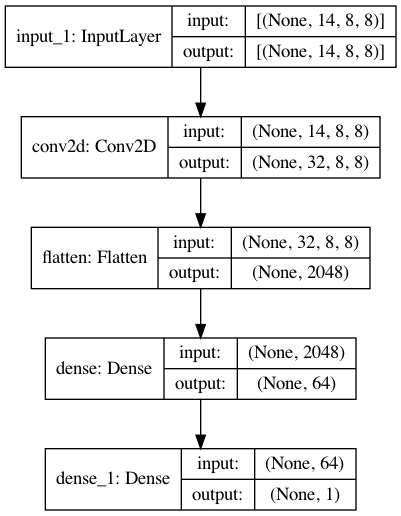

In [7]:
model = build_model(32, 4) # Création du model
# Print le model
utils.plot_model(model, to_file='model.png', show_shapes=True)

In [8]:
# Fonction permettant d'importer le dataset avec les parties d'échecs
# X -> Dataset de d'apprentissage
# y -> Dataset de Test
def get_dataset():
	container = numpy.load('dataset.npz')
	X, y = container['b'], container['v']
	y = normalize(y)
	return X, y

# Permet de normaliser les données de test
def normalize(v):
	return numpy.asarray(v / abs(v).max() / 2 + 0.5, dtype=numpy.float32)

x_train, y_train = get_dataset() # x_train = Valeur 

print(x_train.shape)
print(y_train.shape)

(1500000, 14, 8, 8)
(1500000,)


In [10]:
# Type d'optimisateur
model.compile(optimizer=optimizers.Adam(5e-4), loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train,
          batch_size=2048,
          epochs=1000,
          verbose=1,
          validation_split=0.1,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='loss', patience=30),
                     callbacks.EarlyStopping(monitor='loss', patience=45, min_delta=1e-4)])

model.save('model.h5') # Sauvegarder le modèle

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 14, 8, 8)]        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 8, 8)          4064      
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                131136    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 135,265
Trainable params: 135,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
660/660 [==============================] - 26s 39ms/step - loss: 1.1931e-04 - val_loss: 3.4745e-04
Epoch 2/1

660/660 [==============================] - 25s 38ms/step - loss: 1.1933e-04 - val_loss: 3.4745e-04
Epoch 137/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.2001e-04 - val_loss: 3.4745e-04
Epoch 138/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1919e-04 - val_loss: 3.4745e-04
Epoch 139/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1921e-04 - val_loss: 3.4745e-04
Epoch 140/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1819e-04 - val_loss: 3.4745e-04
Epoch 141/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.2053e-04 - val_loss: 3.4745e-04
Epoch 142/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1976e-04 - val_loss: 3.4745e-04
Epoch 143/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1932e-04 - val_loss: 3.4745e-04
Epoch 144/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1883e-04 - val_loss: 

Epoch 208/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1945e-04 - val_loss: 3.4745e-04
Epoch 209/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1908e-04 - val_loss: 3.4745e-04
Epoch 210/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1972e-04 - val_loss: 3.4745e-04
Epoch 211/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1912e-04 - val_loss: 3.4745e-04
Epoch 212/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1944e-04 - val_loss: 3.4745e-04
Epoch 213/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1848e-04 - val_loss: 3.4745e-04
Epoch 214/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1901e-04 - val_loss: 3.4745e-04
Epoch 215/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1951e-04 - val_loss: 3.4745e-04
Epoch 216/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1966e-

Epoch 280/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1978e-04 - val_loss: 3.4745e-04
Epoch 281/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1924e-04 - val_loss: 3.4745e-04
Epoch 282/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1928e-04 - val_loss: 3.4745e-04
Epoch 283/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.2016e-04 - val_loss: 3.4745e-04
Epoch 284/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1936e-04 - val_loss: 3.4745e-04
Epoch 285/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1979e-04 - val_loss: 3.4745e-04
Epoch 286/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1932e-04 - val_loss: 3.4745e-04
Epoch 287/1000
660/660 [==============================] - 25s 39ms/step - loss: 1.1803e-04 - val_loss: 3.4745e-04
Epoch 288/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1870e-

Epoch 352/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1970e-04 - val_loss: 3.4745e-04
Epoch 353/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1949e-04 - val_loss: 3.4745e-04
Epoch 354/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1893e-04 - val_loss: 3.4745e-04
Epoch 355/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1935e-04 - val_loss: 3.4745e-04
Epoch 356/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1934e-04 - val_loss: 3.4745e-04
Epoch 357/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1851e-04 - val_loss: 3.4745e-04
Epoch 358/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1841e-04 - val_loss: 3.4745e-04
Epoch 359/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1943e-04 - val_loss: 3.4745e-04
Epoch 360/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1916e-

Epoch 424/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1948e-04 - val_loss: 3.4745e-04
Epoch 425/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1849e-04 - val_loss: 3.4745e-04
Epoch 426/1000
660/660 [==============================] - 25s 39ms/step - loss: 1.1926e-04 - val_loss: 3.4745e-04
Epoch 427/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1929e-04 - val_loss: 3.4745e-04
Epoch 428/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1955e-04 - val_loss: 3.4745e-04
Epoch 429/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1956e-04 - val_loss: 3.4745e-04
Epoch 430/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1902e-04 - val_loss: 3.4745e-04
Epoch 431/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1939e-04 - val_loss: 3.4745e-04
Epoch 432/1000
660/660 [==============================] - 25s 38ms/step - loss: 1.1954e-

In [11]:
# Fonction minimax pour évaluer la valeur de l'échiquier
def minimax_eval(board):
    board_matrix = create_3d_matrix_representation(board) # Array de 14 matrices
    board_matrix = numpy.expand_dims(board_matrix, 0) # Wrap dans un array pour obtenir la bonne shape
    return model.predict(board_matrix)[0][0]

# Fonction minimax récursive pour évaluer la valeur de l'échiquier en profondeur.
# Utilise sa propre fonction pour déterminer les valeurs des meilleures déplacements.
# board -> Tableau
# depth -> Nombre de profondeur
# alpha -> Nombre infini negatif
# beta  -> Nombre infini positif
# maximizing_player -> Tour du joueur à maximiser
# Source : https://towardsdatascience.com/create-ai-for-your-own-board-game-from-scratch-minimax-part-2-517e1c1e3362
def minimax(board, depth, alpha, beta, maximizing_player):
    
    if depth == 0 or board.is_game_over():
        return minimax_eval(board)
  
    if maximizing_player:
        max_eval = -numpy.inf
        for move in board.legal_moves:
            board.push(move)
            eval = minimax(board, depth - 1, alpha, beta, False)
            board.pop()
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
        return max_eval
    else:
        min_eval = numpy.inf
        for move in board.legal_moves:
            board.push(move)
            eval = minimax(board, depth - 1, alpha, beta, True)
            board.pop()
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                break
        return min_eval


# Fonction permet de rechercher le déplacement à l'aide de l'intelligence artificielle et la fonction
# minimax
def get_move(board, depth):
  best_move = None
  max_eval = -numpy.inf

  for move in board.legal_moves:
    board.push(move)
    eval = minimax(board, depth - 1, -numpy.inf, numpy.inf, False)
    board.pop()
    if eval > max_eval:
      max_eval = eval
      best_move = move
  
  return best_move

In [19]:
# Le joueur contre l'intelligence artificielle
board = chess.Board()

while not board.is_game_over():
    # AI
    move = get_move(board, 1)
    print("AI: " + str(move))
    board.push(move)
    print(f'{board}\n')
    
    # JOUEUR
    move = chess.Move(chess.parse_square(input('From:' )),chess.parse_square(input('To:')))
    print("Joueur: " + str(move))
    board.push(move)
    print(f'{board}\n')

AI: e2e4
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R

From:e7
To:e5
Joueur: e7e5
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R

AI: d2d4
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . P P . . .
. . . . . . . .
P P P . . P P P
R N B Q K B N R

From:e5
To:d4
Joueur: e5d4
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . . . . .
. . . p P . . .
. . . . . . . .
P P P . . P P P
R N B Q K B N R

AI: c1g5
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . . . B .
. . . p P . . .
. . . . . . . .
P P P . . P P P
R N . Q K B N R

From:d8
To:g5
Joueur: d8g5
r n b . k b n r
p p p p . p p p
. . . . . . . .
. . . . . . q .
. . . p P . . .
. . . . . . . .
P P P . . P P P
R N . Q K B N R

AI: g1f3
r n b . k b n r
p p p p . p p p
. . . . . . . .
. . . . . . q .
. . . p P . . .
. . . . . N . .
P P P . . P P

AssertionError: push() expects move to be pseudo-legal, but got e6g4 in r1b1kb1r/p1p2ppp/2pp1n2/4P3/8/5N2/P4PPP/1R2KB1R

In [ ]:
# Stockfish contre l'intelligence artificielle


board = chess.Board()

with chess.engine.SimpleEngine.popen_uci('stockfish') as engine:
  while not board.is_game_over():
    # AI
    move = get_move(board, 4)
    print("AI: " + str(move))
    board.push(move)
    print(f'{board}\n')
    
    # Stockfish
    move = engine.analyse(board, chess.engine.Limit(time=1), info=chess.engine.INFO_PV)['pv'][0]
    board.push(move)
    print("STOCKFISH: " + str(move))
    print(f'{board}\n')

AI: e2e3
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . P . . .
P P P P . P P P
R N B Q K B N R

STOCKFISH: e7e6
r n b q k b n r
p p p p . p p p
. . . . p . . .
. . . . . . . .
. . . . . . . .
. . . . P . . .
P P P P . P P P
R N B Q K B N R

AI: b1c3
r n b q k b n r
p p p p . p p p
. . . . p . . .
. . . . . . . .
. . . . . . . .
. . N . P . . .
P P P P . P P P
R . B Q K B N R

STOCKFISH: d7d5
r n b q k b n r
p p p . . p p p
. . . . p . . .
. . . p . . . .
. . . . . . . .
. . N . P . . .
P P P P . P P P
R . B Q K B N R

AI: d2d4
r n b q k b n r
p p p . . p p p
. . . . p . . .
. . . p . . . .
. . . P . . . .
. . N . P . . .
P P P . . P P P
R . B Q K B N R

STOCKFISH: g8f6
r n b q k b . r
p p p . . p p p
. . . . p n . .
. . . p . . . .
. . . P . . . .
. . N . P . . .
P P P . . P P P
R . B Q K B N R

AI: c1d2
r n b q k b . r
p p p . . p p p
. . . . p n . .
. . . p . . . .
. . . P . . . .
. . N . P . . .
P P P B . P P P
R . . Q K B N R

STOCKFISH: c7